## Final Project Submission

Please fill out:
* Student name: Rafael Villanueva
* Student pace: part time  
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL:


Begin by explaining the project outline and the projects obejectives. What questions are you trying to answer with the data set? what is the data set and where did you get it? 

This project has multiple data sets that contain data about movies from Box Office Mojo, IMDB, Rotten Tomatoes, and TheMovieDB.org.

The basis of this project is to attempt to gain a better understanding of the movie industry in order to increase the chances of success of a new movie studio that focuses on original content. This will be accomplished using various Python libraries and basic summary statistics to highlight key drivers of movie success.  



What are the key drivers of popularity? (stars etc.)
    timing of release (season) ?
    can we break these into percentiles? i.e. does 75th percentile define success?
    rating
    genre 
    lead character M/F?
    release year
    duration
Visualizations
    Distribution of ratings,release time (season or year) , budget
    bar plot - rating
    
    
    

In [2]:
# import libraries using appropiate aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 
from functools import reduce
%matplotlib inline

In [3]:
#load movie data from the imdb data set into pandas dataframes
name_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\name_basics.csv")
title_akas = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_akas.csv")
title_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_basics.csv")
title_crew = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_crew.csv")
title_ratings = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_ratings.csv")

get an idea of whats in each data set using the .head() method. 

In [4]:
#name_basics.head()
#title_basics.head()
#title_crew.head()
#title_ratings.head()

In [5]:
#list of column names, some of these might need to be re-labeled.
# Each table of the IMDb data set has a unique movie identifier that is common in each data set
# but they have different names, re name al id columns to title_id

#list(name_basics.columns.values)
list(title_akas.columns.values)
#list(title_basics.columns.values)
#list(title_crew.columns.values)
#list(title_ratings.columns.values)

['title_id',
 'ordering',
 'title',
 'region',
 'language',
 'types',
 'attributes',
 'is_original_title']

renaming columns in imdb datasets to make title_id consistent between the data sets to prepare for merge

In [6]:
name_basics.rename(columns = {'nconst' : 'title_id'}, inplace = True)
title_basics.rename(columns = {'tconst' : 'title_id'}, inplace = True)
title_crew.rename(columns = {'tconst' : 'title_id'}, inplace = True)
title_ratings.rename(columns = {'tconst' : 'title_id'}, inplace = True)

now we have a column that is common to each data set, it might be easier to look at all of the imdb data in one table.However joining this many data sets could cause errors, instead data sets will be joined where appropriate. We will set the index to 'titled_id' so that the index is constant across the data sets. 

In [7]:
#title_basics.set_index('title_id', inplace=True)
#name_basics.set_index('title_id', inplace=True)
#title_crew.set_index('title_id', inplace=True)
#title_ratings.set_index('title_id', inplace=True)

After looking at what each data set contains above, it may be useful to compare several variables to 'average rating' to see what makes a movie popular. since we now have a common index to merge on, we can match values in each data set during the merging process. 

In [8]:
title_basics_and_ratings = pd.merge(title_basics, title_ratings, on='title_id', how='inner')
title_basics_and_ratings

,title_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [9]:
title_akas_and_ratings = pd.merge(title_akas, title_ratings, on='title_id', how='inner')
title_akas_and_ratings

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,7.0,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0,7.0,539338
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0,7.0,539338
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,7.0,539338
...,...,...,...,...,...,...,...,...,...,...
261801,tt9726638,2,Monkey King: The Volcano,NaN,NaN,original,NaN,1.0,6.0,6
261802,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,NaN,0.0,6.0,6
261803,tt9827784,1,Sayonara kuchibiru,JP,NaN,NaN,NaN,0.0,7.7,6
261804,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0,7.7,6


We now have two data sets that contain data from three different data sets. Both the Title Aka's and Title Basics were merged to Title Ratings. Visually inspecting the data we see there is a lot of missing values but their could also be other issues with the data such as incorrect data type for analysis or outliers which we will address in this section using basic visualizations and summary statistics. We will work on the title_basics_and_ratings and then the title_akas_and_ratings data set.

In [10]:
# start by getting a general idea of the data set 
title_basics_and_ratings.dtypes

title_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [11]:
# Column headers are objects by default. The columns primary title, original title , and genres should be
# a string data type since these are text based data so to make sure the column contents are the correct data type we will 
#use the following code. 

#title_basics_and_ratings.astype(str)['genres'].map(lambda x:  type(x))
#title_basics_and_ratings.astype(str)['primary_title'].map(lambda x:  type(x))
#title_basics_and_ratings.astype(str)['original_title'].map(lambda x:  type(x))

After inspecting the data type, it appears all the data types are now in the correct format. We will now move onto searching for outliers and missing data. Again as mentioned above a simple way to do this is using descriptive statistics and visualizations such as boxplots and histograms to understand the distribution of the data. 

In [12]:
title_basics_and_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


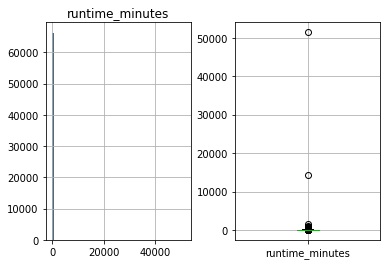

In [13]:
fig, axes = plt.subplots(1, 2)

title_basics_and_ratings.hist('runtime_minutes', bins=100, ax=axes[0])
title_basics_and_ratings.boxplot(column = ['runtime_minutes'])


Using the .describe() method as well as visualizing run time using a box plot and histogram there is some cleaning to do. it looks like the median runtime is 91 minutes and the 75 th percentile of runtime for movies is 104 minutes. However box office hits like ' The lord of the Rings' (average run time for all three movies is 204 minutes) and 'Avatar' (162 minutes) were much longer than this. So lets remove movies that are longer the say 250 minutes. 

In [14]:
indextime = title_basics_and_ratings[title_basics_and_ratings['runtime_minutes'] >= 250].index

In [15]:
title_basics_and_ratings.drop(indextime , inplace=True)

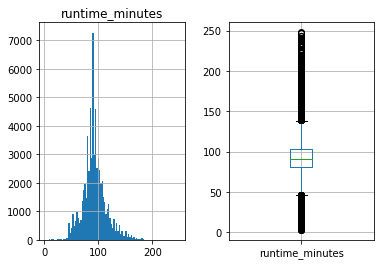

In [16]:
fig, axes = plt.subplots(1, 2)

title_basics_and_ratings.hist('runtime_minutes', bins=100, ax=axes[0])
title_basics_and_ratings.boxplot(column = ['runtime_minutes'])

In [17]:
title_basics_and_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73782.000000,66162.000000,73782.000000,7.378200e+04
mean,2014.276666,93.346740,6.331800,3.525846e+03
std,2.614700,22.520796,1.474554,3.030804e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,248.000000,10.000000,1.841066e+06


Looking good! from our visualizations above we see that the distribution appears nrmal and the boxplot is within the range we set for outliers (250 mins). one last column we may want to look at is the 'num votes' column as comparing data sets with too little votes may result in a false representation of the data. We will use the same method we used for run time. 

In [18]:
title_basics_and_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73782.000000,66162.000000,73782.000000,7.378200e+04
mean,2014.276666,93.346740,6.331800,3.525846e+03
std,2.614700,22.520796,1.474554,3.030804e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,248.000000,10.000000,1.841066e+06


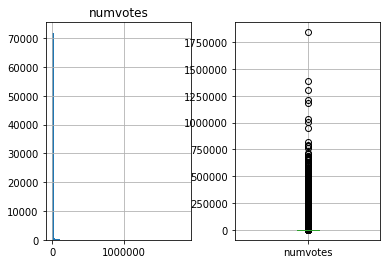

In [19]:
fig, axes = plt.subplots(1, 2)

title_basics_and_ratings.hist('numvotes', bins=100, ax=axes[0])
title_basics_and_ratings.boxplot(column = ['numvotes'])

Yikes, there is definetely a large spread in the data. For this parameter, lets use the interquartile range or IQR values to capture the movies between the 25th and 75th percentile of number of votes. The 25th percentile is 

In [20]:
q1 = title_basics_and_ratings['numvotes'].quantile(0.25)
q3  = title_basics_and_ratings['numvotes'].quantile(0.75)

title_basics_and_ratings_cleaned = title_basics_and_ratings[(title_basics_and_ratings['numvotes'] < q3) & (title_basics_and_ratings['numvotes'] > q1)]

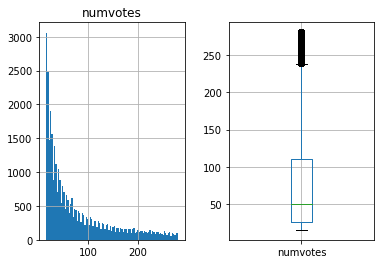

In [21]:
fig, axes = plt.subplots(1, 2)

title_basics_and_ratings_cleaned.hist('numvotes', bins=100, ax=axes[0])
title_basics_and_ratings_cleaned.boxplot(column = ['numvotes'])

We have now removed the outliers in number of votes. However looking at the distribution in the number of votes it appears to be skewed right, we will discuss this later when comparing the data. We will remove the rows with missing data and now have a cleaned data set and will export it to a .csv file to use in data exploration and visualization. 

In [22]:
cleaned_titlebasics_and_ratings = title_basics_and_ratings_cleaned.dropna(how = 'all')

In [23]:
cleaned_titlebasics_and_ratings.to_csv(r'C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\Cleaned data\Module_1\cleaned_titlebasics_and_ratings.csv')

We completed the first data set, now we wil use similiar methods to clean the second data set. We'll start by getting an idea of what the data set looks like, missing values, and summary statistics. 

In [24]:
title_akas_and_ratings.shape

(261806, 10)

In [25]:
# lets look at the data base again to see what we are working with. 
title_akas_and_ratings.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,7.0,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0,7.0,539338
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0,7.0,539338
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,7.0,539338


In [26]:
title_akas_and_ratings.isna().sum()

title_id                  0
ordering                  0
title                     0
region                43465
language             224726
types                108538
attributes           248882
is_original_title         0
averagerating             0
numvotes                  0
dtype: int64

Lots of missing data, lets remove those rows before we continue. 

In [27]:

title_akas_and_ratings.drop(['region', 'language','types','attributes'], axis=1, inplace=True)

In [29]:
title_akas_and_ratings.shape

(261806, 6)

In [30]:
title_akas_and_ratings.dtypes

title_id              object
ordering               int64
title                 object
is_original_title    float64
averagerating        float64
numvotes               int64
dtype: object

In [31]:
title_akas_and_ratings.head()

,title_id,ordering,title,is_original_title,averagerating,numvotes
0,tt0369610,10,Джурасик свят,0.0,7.0,539338
1,tt0369610,11,Jurashikku warudo,0.0,7.0,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,0.0,7.0,539338
3,tt0369610,13,O Mundo dos Dinossauros,0.0,7.0,539338
4,tt0369610,14,Jurassic World,0.0,7.0,539338


In [32]:
title_akas_and_ratings.describe()

,ordering,is_original_title,averagerating,numvotes
count,261806.000000,261806.000000,261806.000000,2.618060e+05
mean,6.094788,0.140925,6.272423,2.878090e+04
std,7.214429,0.347945,1.257559,9.473448e+04
min,1.000000,0.000000,1.000000,5.000000e+00
25%,1.000000,0.000000,5.600000,6.200000e+01
50%,3.000000,0.000000,6.400000,6.170000e+02
75%,7.000000,0.000000,7.100000,7.505500e+03
max,61.000000,1.000000,10.000000,1.841066e+06


NameError: name 'title_akas_and_ratings1' is not defined

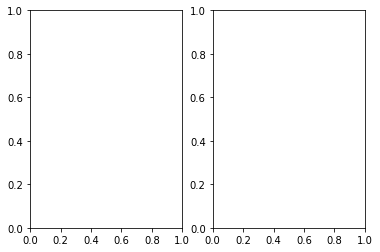

In [33]:
fig, axes = plt.subplots(1, 2)

title_akas_and_ratings1.hist('averagerating', bins=100, ax=axes[0])
title_akas_and_ratings1.boxplot(column = ['averagerating'])

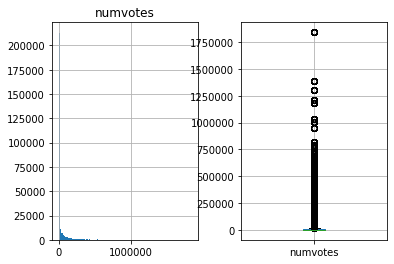

In [35]:
fig, axes = plt.subplots(1, 2)

title_akas_and_ratings.hist('numvotes', bins=100, ax=axes[0])
title_akas_and_ratings.boxplot(column = ['numvotes'])

While average rating looks to be in good shape, we will have to clean the numvotes category so that our analysis is consistent. We will use the same method as was used on the earlier data set.

In [38]:
q1 = title_akas_and_ratings['numvotes'].quantile(0.25)
q3  = title_akas_and_ratings['numvotes'].quantile(0.75)

title_akas_and_ratings2 = title_akas_and_ratings[(title_akas_and_ratings['numvotes'] < q3) & (title_akas_and_ratings['numvotes'] > q1)]

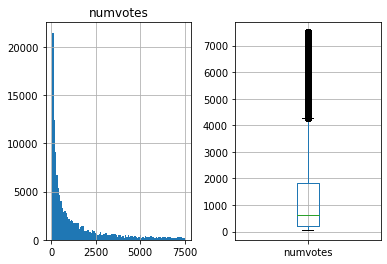

In [39]:
fig, axes = plt.subplots(1, 2)

title_akas_and_ratings2.hist('numvotes', bins=100, ax=axes[0])
title_akas_and_ratings2.boxplot(column = ['numvotes'])

The data appears to be skewed to the right and the box plot confirms there are many outliers. We will create another filter to remove these outliers and check the distribution again. 

In [42]:
cleaned_title_akas_and_ratings = title_akas_and_ratings2[(title_akas_and_ratings['numvotes'] < 3000)]

C:\Users\rafav\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


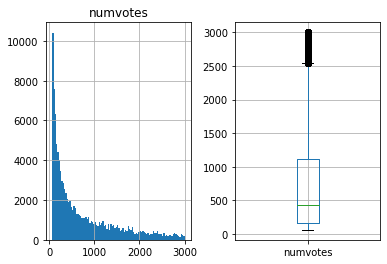

In [43]:
fig, axes = plt.subplots(1, 2)

cleaned_title_akas_and_ratings.hist('numvotes', bins=100, ax=axes[0])
cleaned_title_akas_and_ratings.boxplot(column = ['numvotes'])

still some outliers and the data is skewed but this data may still provide insights. We are done cleaning this data set and will export it like we did the last data set. 

In [44]:
cleaned_title_akas_and_ratings.to_csv(r'C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\Cleaned data\Module_1\cleaned_title_akas_and_ratings.csv')